# HW 5

## Step 1: Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 255)

# Load the dataset
df = pd.read_csv('Breast_Cancer_dataset.csv')

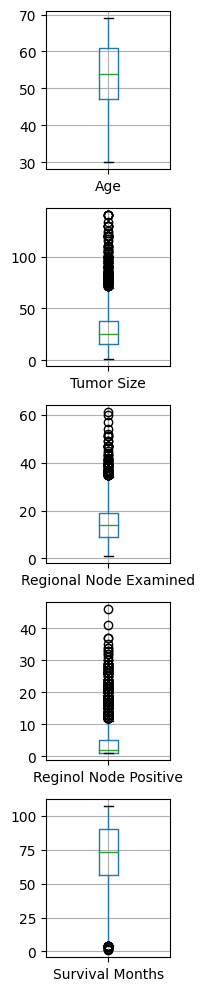

In [2]:
# Display boxplots for numeric columns to identify outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(len(numeric_cols), figsize=(2, 2*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    df.boxplot(column = col, ax=ax[i])
plt.tight_layout()
plt.show()

* We could observe some outliers from the box plot; however, I do not think we should drop them as these medical data can be meaningful and not really "outliers."
* If some data points are really outliers, we could avoid overfitting to them by tuning the hyperparameters during the model building stage.

In [3]:
# Handle missing values
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


* There is no missing value.

In [4]:
# Encode the label 'Status'
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})

# Prepare for encoding and scaling
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Define column transformer for input features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data, excluding the 'Status' column
features = df.drop('Status', axis=1)
labels = df['Status']
processed_features = preprocessor.fit_transform(features)

# Convert processed data back to DataFrame
column_names = preprocessor.transformers_[0][1].get_feature_names_out(numeric_cols).tolist() + \
               preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
processed_features_df = pd.DataFrame(processed_features, columns=column_names, index=features.index)
processed_features_df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,1.565253,-1.253661,1.190676,-0.618172,-0.492961,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.443222,0.214345,-0.044095,0.164807,-0.405695,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.449434,1.540287,-0.044095,0.556296,0.161530,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.449434,-0.590691,-1.525820,-0.618172,0.554224,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.777968,0.498475,-1.402343,-0.618172,-0.929288,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


* For columns with numerical entries, I normalize and standardize them.
* For columns with categorical entries, I use one hot encoder to transform them.

In [5]:
# Dimensionality Reduction
print(f"Original number of features: {len(column_names)}")
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(processed_features_df)
print(f"Reduced number of features: {principal_components.shape[1]}")

# Convert processed data back to DataFrame
pc_df = pd.DataFrame(principal_components, index=features.index)
processed_df = pd.concat([pc_df, labels], axis=1)

# Save the preprocessed data
processed_df.to_csv('Preprocessed_Breast_Cancer_dataset.csv', index=False)
processed_df.head()

Original number of features: 39
Reduced number of features: 14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Status
0,-0.722600,1.891734,0.658036,-0.485737,1.058784,1.217597,1.093034,-0.028214,-0.161259,-0.398546,-0.802221,-0.052924,-0.102105,-0.012135,1
1,0.625022,-0.431951,0.056627,0.004893,-0.921548,-0.254785,-0.316749,-1.192142,0.449082,-0.417097,-0.086896,-0.157660,-0.001819,0.162792,1
2,1.477820,-0.307475,0.340365,1.256374,-0.519105,-0.810235,0.207590,0.817970,-0.202448,0.728068,-0.246595,-0.259085,0.750649,0.323419,1
3,-1.701681,-0.088784,0.305473,-0.042539,1.541953,-0.774191,0.292878,0.148141,-0.246419,-0.388545,-0.786221,-0.098083,-0.055942,0.014945,1
4,-0.388995,-1.910268,0.818558,-0.892258,0.826852,0.270283,-0.764835,0.242398,0.050841,-0.463051,-0.690605,-0.182191,-0.009606,-0.027502,1


* As there are too many columns, I use PCA to do the dimensionality reduction.

## Step 2: Modeling 

In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Preprocessed_Breast_Cancer_dataset.csv')
X = df.drop('Status', axis=1)
y = df['Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selected features based on threshold (0.01): ['2', '9', '0', '8', '3', '13', '4', '1', '11', '10']


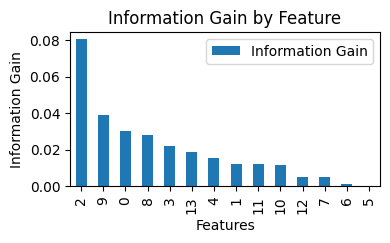

In [7]:
# Calculate information gain for each feature
info_gains = mutual_info_classif(X_train, y_train)
info_gain_df = pd.DataFrame(info_gains, index=X.columns, columns=['Information Gain']).sort_values(by='Information Gain', ascending=False)

# Plotting the information gains
info_gain_df.sort_values('Information Gain', ascending=False).plot(kind='bar', figsize=(4, 2))
plt.title('Information Gain by Feature')
plt.ylabel('Information Gain')
plt.xlabel('Features')

# Selecting features above a certain threshold
threshold = 0.01 
selected_features = info_gain_df[info_gain_df['Information Gain'] > threshold].index.tolist()

print(f"Selected features based on threshold ({threshold}): {selected_features}")

In [8]:
# Restrict the dataset to the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

* I exclude all the features with information gain less than 0.01. These features will not contribute much of the performance of the model and might cause problems like overfitting.

In [9]:
# KNN
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

knn = KNN(k=3)
knn.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_knn = knn.predict(X_test.to_numpy())

* Summary: KNN is a simple and intuitive algorithm that classifies a new data point based on the majority label of the nearest k points.
* Pros: Easy to understand and implement.
* Cons: Computationally expensive, sensitive to the scale of the data and outliers.
* Main Hyperparameters: k (number of neighbors), distance metric (e.g., Euclidean, Manhattan).

In [10]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

* Summary: Assumes independence among predictors and is a fast classifier for large datasets.
* Pros: Efficient, not biased by outliers, works well with high dimensions.
* Cons: Assumes feature independence and normally distributed data.
* Main Hyperparameters: None significant for the basic Gaussian version.

In [11]:
# C4.5 Decision Tree 
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy')  # Entropy for the C4.5 Decision Tree 
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

* Summary: Creates a model that predicts the value of a target variable by learning simple decision rules from the features.
* Pros: Easy to understand and interpret, doesn't require feature scaling.
* Cons: Prone to overfitting, sensitive to noisy data.
* Main Hyperparameters: criterion (function to measure the quality of a split), max_depth (maximum depth of the tree), min_samples_split (minimum number of samples required to split an internal node).

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

* Summary: An ensemble method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
* Pros: Reduces overfitting, handles unbalanced data.
* Cons: Slow real-time prediction, complex, and difficult to interpret.
* Main Hyperparameters: n_estimators (number of trees in the forest), max_features (max number of features considered for splitting a node), max_depth (max number of levels in each decision tree).

In [13]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

* Summary: Builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.
* Pros: Often provides predictive accuracy that cannot be trumped.
* Cons: Prone to overfitting if not tuned properly, can be slow to train.
* Main Hyperparameters: n_estimators (number of boosting stages to perform), learning_rate (contributes to the weights of new trees), max_depth (limits the number of nodes in the tree).

In [14]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

print("Evaluating KNN")
evaluate_model(y_test, y_pred_knn)

print("Evaluating Naive Bayes")
evaluate_model(y_test, y_pred_nb)

print("Evaluating C4.5 Decision Tree")
evaluate_model(y_test, y_pred_tree)

print("Evaluating Random Forest")
evaluate_model(y_test, y_pred_rf)

print("Evaluating Gradient Boosting")
evaluate_model(y_test, y_pred_gb)

Evaluating KNN
Accuracy: 0.88
Precision: 0.91
Recall: 0.96
F1 Score: 0.93
Confusion Matrix:
[[ 51  69]
 [ 24 661]]

Evaluating Naive Bayes
Accuracy: 0.88
Precision: 0.91
Recall: 0.96
F1 Score: 0.93
Confusion Matrix:
[[ 52  68]
 [ 27 658]]

Evaluating C4.5 Decision Tree
Accuracy: 0.83
Precision: 0.92
Recall: 0.88
F1 Score: 0.90
Confusion Matrix:
[[ 68  52]
 [ 83 602]]

Evaluating Random Forest
Accuracy: 0.90
Precision: 0.91
Recall: 0.98
F1 Score: 0.94
Confusion Matrix:
[[ 52  68]
 [ 15 670]]

Evaluating Gradient Boosting
Accuracy: 0.90
Precision: 0.91
Recall: 0.97
F1 Score: 0.94
Confusion Matrix:
[[ 57  63]
 [ 20 665]]



## Step 3: Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=3,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=1)
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score: {grid_search_dt.best_score_}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8543025784405094


* The best set of parameters of decision tree model is shown as above.

In [16]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb,
                              cv=3,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=1)
grid_search_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best score: {grid_search_gb.best_score_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8863000931966449


* The best set of parameters of gradient boosting model is shown as above.

## Step 4: Results

In [17]:
# Initialize the Decision Tree model with best hyperparameters
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5)
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [18]:
# Initialize the Gradient Boosting model with best hyperparameters
best_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=200)
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)

# Evaluate Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [19]:
from sklearn.metrics import roc_curve, auc

results = {
    "Model": ["Decision Tree", "Gradient Boosting"],
    "Best Hyperparameters": [
        "{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}",
        "{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}"
    ],
    "Accuracy": [accuracy_dt, accuracy_gb],
    "Precision": [precision_dt, precision_gb],
    "Recall": [recall_dt, recall_gb],
    "F1 Score": [f1_dt, f1_gb]
}

results_df = pd.DataFrame(results)
results_df

,Model,Best Hyperparameters,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}",0.858385,0.907275,0.928467,0.917749
1,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}",0.904348,0.913043,0.981022,0.945813


* The above table shows comparison between decision tree and gradient boosting after tuning the hyperparameters.

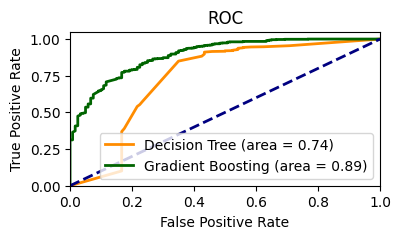

In [20]:
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_gb, tpr_gb, _ = roc_curve(y_test, best_gb.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(4, 2))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (area = {roc_auc_dt:.2f})')
plt.plot(fpr_gb, tpr_gb, color='darkgreen', lw=2, label=f'Gradient Boosting (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

* The above graph is the ROC curve of decision tree vs gradient boosting.

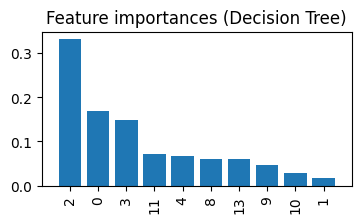

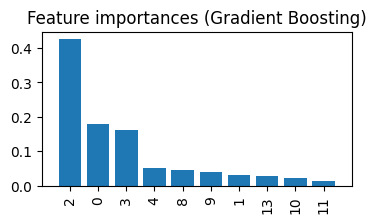

In [21]:
# For Decision Tree
importances_dt = grid_search_dt.best_estimator_.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(4, 2))
plt.title("Feature importances (Decision Tree)")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_dt], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# For Gradient Boosting
importances_gb = grid_search_gb.best_estimator_.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(4, 2))
plt.title("Feature importances (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_gb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


* The above graphs show the most important features used in the classification (though they might not look descriptive as we have performed PCA beforehand; if we do not perform any dimensionality reduction, the feature importance graphs will be more descriptive).

## Conclusion

* After tuning the hyperparameters, the Decision Tree model achieved an accuracy of 0.86, a precision of 0.91, a recall of 0.93, and an F1 score of 0.92.
* The Gradient Boosting model, similarly optimized, reached an accuracy of 0.90, a precision of 0.91, a recall of 0.98, and an F1 score of 0.95.
* Dimensionality was reduced from 35 features to 14, while still retaining 95% of the variance through PCA.
* During the feature selection phase, one feature was excluded.
* It is apparent that certain features are more influential than others in the classification process. However, the graphs depicting feature importance are less illustrative due to the prior application of PCA. If no dimensionality reduction were performed, the feature importance graphs would provide clearer insights.